<a href="https://colab.research.google.com/github/mashalshaikh95/Elective_Home_Education_UK/blob/main/Homeschooling_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the data**

In [1]:
import pandas as pd
import seaborn as sns

# load dataset and overview
df=pd.read_excel('/content/dataset.xlsx')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   time_period                                 307 non-null    int64  
 1   time_identifier                             307 non-null    object 
 2   geographic_level                            307 non-null    object 
 3   country_code                                307 non-null    object 
 4   country_name                                307 non-null    object 
 5   region_code                                 307 non-null    object 
 6   region_name                                 307 non-null    object 
 7   old_la_code                                 287 non-null    float64
 8   new_la_code                                 287 non-null    object 
 9   la_name                                     287 non-null    object 
 10  ehe_census_dat

**Data Cleaning**

In [2]:
# data cleaning
# 1st: remove unnecessary data
df = df.drop(['country_code', 'country_name','region_code','old_la_code','new_la_code','ehe_census_date'], axis=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   time_period                                 307 non-null    int64 
 1   time_identifier                             307 non-null    object
 2   geographic_level                            307 non-null    object
 3   region_name                                 307 non-null    object
 4   la_name                                     287 non-null    object
 5   ehe_female                                  307 non-null    int64 
 6   ehe_male                                    307 non-null    int64 
 7   ehe_sex_unknown                             307 non-null    int64 
 8   ehe_reception                               307 non-null    int64 
 9   ehe_year1                                   307 non-null    int64 
 10  ehe_year2                 

**Removing null values**

In [3]:
# removing null values
final_df=df.dropna()
print(final_df.isnull().sum().sum())
final_df.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 10 to 306
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   time_period                                 287 non-null    int64 
 1   time_identifier                             287 non-null    object
 2   geographic_level                            287 non-null    object
 3   region_name                                 287 non-null    object
 4   la_name                                     287 non-null    object
 5   ehe_female                                  287 non-null    int64 
 6   ehe_male                                    287 non-null    int64 
 7   ehe_sex_unknown                             287 non-null    int64 
 8   ehe_reception                               287 non-null    int64 
 9   ehe_year1                                   287 non-null    int64 
 10  ehe_year2                   

**Checking for duplicates**

In [4]:
# first check if duplicate data exists
duplicateRows = final_df[final_df.duplicated(keep='last')]
print(duplicateRows)
# no duplicates are found


Empty DataFrame
Columns: [time_period, time_identifier, geographic_level, region_name, la_name, ehe_female, ehe_male, ehe_sex_unknown, ehe_reception, ehe_year1, ehe_year2, ehe_year3, ehe_year4, ehe_year5, ehe_year6, ehe_year7, ehe_year8, ehe_year9, ehe_year10, ehe_year11, ehe_year_unknown, ehe_reason_physical_health, ehe_reason_mental_health, ehe_reason_health_covid, ehe_reason_school_preference, ehe_reason_perm_exc, ehe_reason_risk_exc, ehe_reason_access, ehe_reason_philosophical, ehe_reason_religious, ehe_reason_lifestyle, ehe_reason_school_suggestion, ehe_reason_school_dissatisfaction_general, ehe_reason_school_dissatisfaction_send, ehe_reason_school_dissatisfaction_bullying, ehe_reason_no_reason_given, ehe_reason_other, ehe_reason_unknown]
Index: []

[0 rows x 38 columns]


**Distibution of data into Male and Female and total terms**

In [5]:
final_df.head()

#total male, females and unknown sex students in autumn and spring term
males_autumn=final_df['ehe_male'].sum()
print('Total male students in EHE',males_autumn)
females_autumn=final_df['ehe_female'].sum()
print('Total female students in EHE',females_autumn)



#Term wise calculation
#autumn term
total_autumn=final_df.loc[final_df['time_identifier']=='Autumn term']
noF_males_autumn=total_autumn['ehe_male'].sum()
noF_females_autumn=total_autumn['ehe_female'].sum()
noF_nosex_autumn=total_autumn['ehe_sex_unknown'].sum()
print('Number of Males in Autumn Term:',noF_males_autumn)
print('Number of Females in Autumn Term:',noF_females_autumn)


#spring term
total_spring=final_df.loc[final_df['time_identifier']=='Spring term']
noF_males_spring=total_spring['ehe_male'].sum()
noF_females_spring=total_spring['ehe_female'].sum()
noF_nosex_spring=total_spring['ehe_sex_unknown'].sum()
print('Number of Males in Spring Term:',noF_males_spring)
print('Number of Females in Spring Term:',noF_females_spring)





Total male students in EHE 78100
Total female students in EHE 81130
Number of Males in Autumn Term: 37860
Number of Females in Autumn Term: 39060
Number of Males in Spring Term: 40240
Number of Females in Spring Term: 42070


Text(0.5, 1.0, 'Distribution of male, female students opted for EHE accross terms')

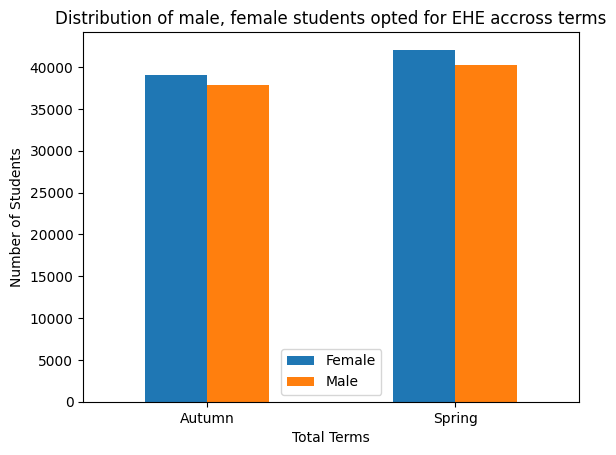

In [6]:
# now create bar chart
female = [noF_females_autumn,noF_females_spring]
male = [noF_males_autumn,noF_males_spring]
unknown_sex=[noF_nosex_autumn, noF_nosex_spring]
index = ['Autumn', 'Spring']
df = pd.DataFrame({'Female': female,
                   'Male': male, }, index=index)
ax = df.plot.bar(rot=0)
ax.set_ylabel('Number of Students')
ax.set_xlabel('Total Terms')
ax.set_title('Distribution of male, female students opted for EHE accross terms')


**Male students opt for EHE accross different regions of UK**




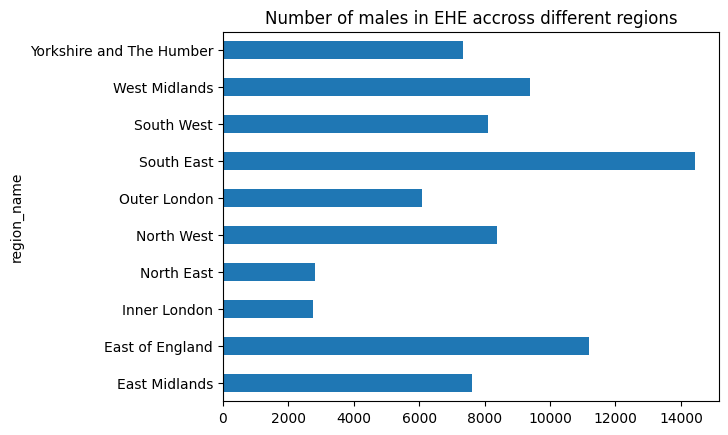

In [7]:


re_male=final_df.groupby('region_name')['ehe_male'].sum().plot.barh(title='Number of males in EHE accross different regions')



**Female students opt for EHE accross different regions of UK**


Number of females in EHE accross different regions


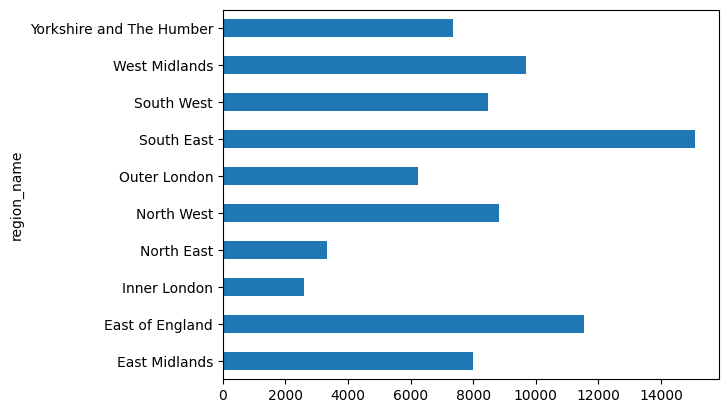

In [ ]:
print("Number of females in EHE accross different regions")

re_female=final_df.groupby('region_name')['ehe_female'].sum().plot.barh()


**Growth of Elective Home Education along Years**

In [ ]:

recep=final_df['ehe_reception'].sum()
ehe_year1=final_df['ehe_year1'].sum()
ehe_year2=final_df['ehe_year2'].sum()
ehe_year3=final_df['ehe_year3'].sum()
ehe_year4=final_df['ehe_year4'].sum()
ehe_year5=final_df['ehe_year5'].sum()
ehe_year6=final_df['ehe_year6'].sum()
ehe_year7=final_df['ehe_year7'].sum()
ehe_year8=final_df['ehe_year8'].sum()
ehe_year9=final_df['ehe_year9'].sum()
ehe_year10=final_df['ehe_year10'].sum()
ehe_year11=final_df['ehe_year11'].sum()



import plotly.express as px
fig = px.line(df, x="Years", y="Number_of_students",
              title='Growth of Elective Home Education along Years',
              labels={'Year': 'Year', 'Number of Home Educated Children': 'Number of Home Educated Children'})

# Show the plot
fig.show()



**Exploring Reasons for EHE:**


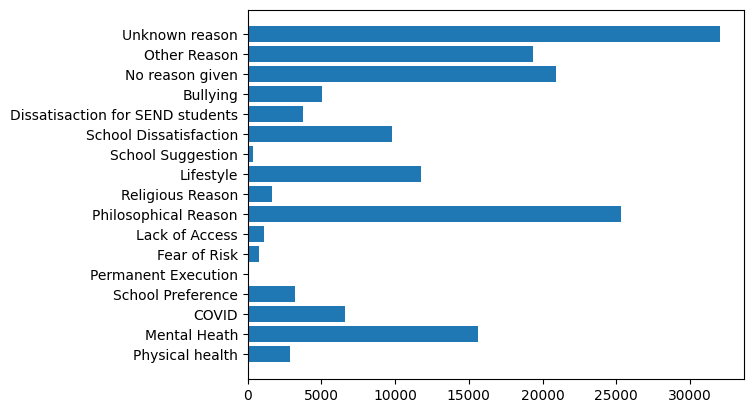

In [22]:
import matplotlib.pyplot as plt
final_df['ehe_reason_religious'] = pd.to_numeric(final_df['ehe_reason_religious'], errors='coerce')
final_df['ehe_reason_physical_health'] = pd.to_numeric(final_df['ehe_reason_physical_health'], errors='coerce')
final_df['ehe_reason_mental_health'] = pd.to_numeric(final_df['ehe_reason_mental_health'], errors='coerce')
final_df['ehe_reason_philosophical'] = pd.to_numeric(final_df['ehe_reason_philosophical'], errors='coerce')

r1=final_df['ehe_reason_physical_health'].sum()
r2=final_df['ehe_reason_mental_health'].sum()
r3=final_df['ehe_reason_health_covid'].sum()
r4=final_df['ehe_reason_school_preference'].sum()
r5=final_df['ehe_reason_perm_exc'].sum()
r6=final_df['ehe_reason_risk_exc'].sum()
r7=final_df['ehe_reason_access'].sum()
r8=final_df['ehe_reason_philosophical'].sum()
r9=final_df['ehe_reason_religious'].sum()
r10=final_df['ehe_reason_lifestyle'].sum()
r11=final_df['ehe_reason_school_suggestion'].sum()
r12=final_df['ehe_reason_school_dissatisfaction_general'].sum()
r13=final_df['ehe_reason_school_dissatisfaction_send'].sum()
r14=final_df['ehe_reason_school_dissatisfaction_bullying'].sum()
r15=final_df['ehe_reason_no_reason_given'].sum()
r16=final_df['ehe_reason_other'].sum()
r17=final_df['ehe_reason_unknown'].sum()


reasons=['Physical health','Mental Heath','COVID','School Preference','Permanent Execution','Fear of Risk',
         'Lack of Access','Philosophical Reason','Religious Reason','Lifestyle','School Suggestion','School Dissatisfaction','Dissatisaction for SEND students',
         'Bullying','No reason given','Other Reason','Unknown reason']
rlist=[r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17]
plt.barh(reasons,rlist, )
plt.show()



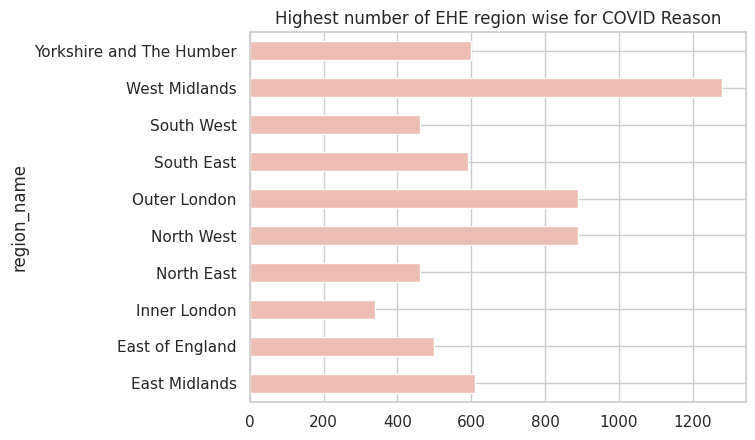

In [ ]:

rep_female=final_df.groupby('region_name')['ehe_reason_health_covid'].sum().plot.barh(title="Highest number of EHE region wise for COVID Reason", color='#edbdb1')




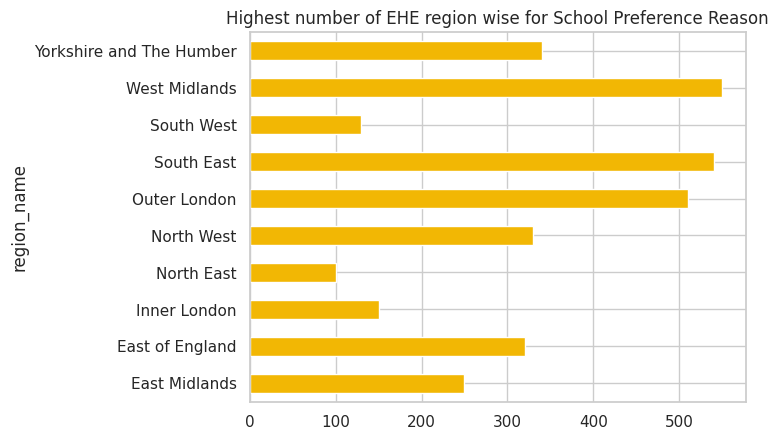

In [ ]:
rep_female=final_df.groupby('region_name')['ehe_reason_school_preference'].sum().plot.barh(title="Highest number of EHE region wise for School Preference Reason", color='#f2b704')


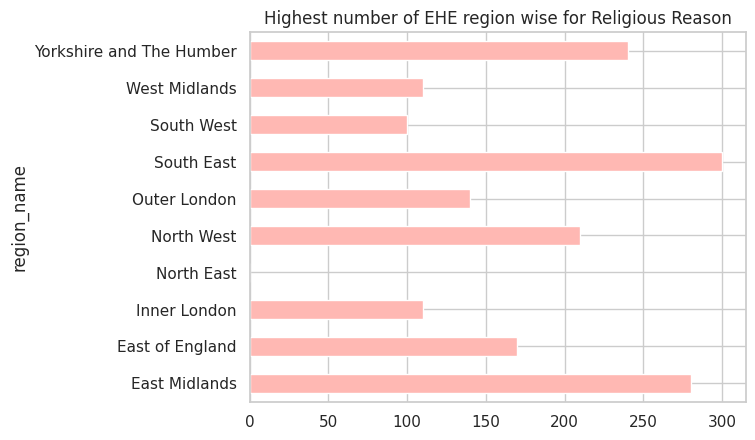

In [ ]:
final_df['ehe_reason_religious'] = pd.to_numeric(final_df['ehe_reason_religious'], errors='coerce')

rep_female=final_df.groupby('region_name')['ehe_reason_religious'].sum().plot.barh(title="Highest number of EHE region wise for Religious Reason", color='#ffb8b3')


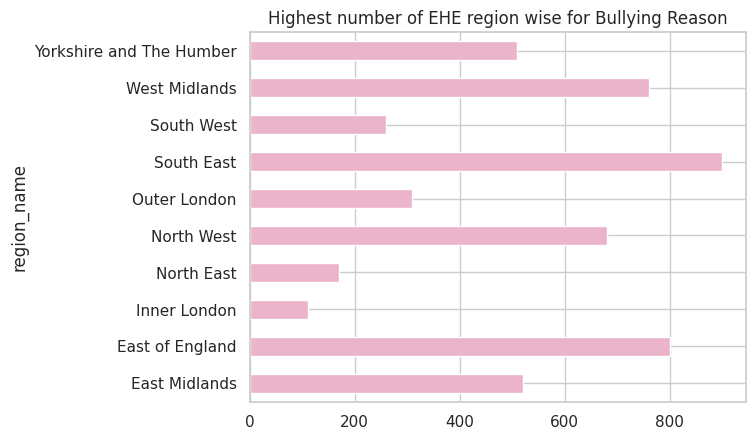

In [ ]:
rep_female=final_df.groupby('region_name')['ehe_reason_school_dissatisfaction_bullying'].sum().plot.barh(title="Highest number of EHE region wise for Bullying Reason", color='#ebb4cb')


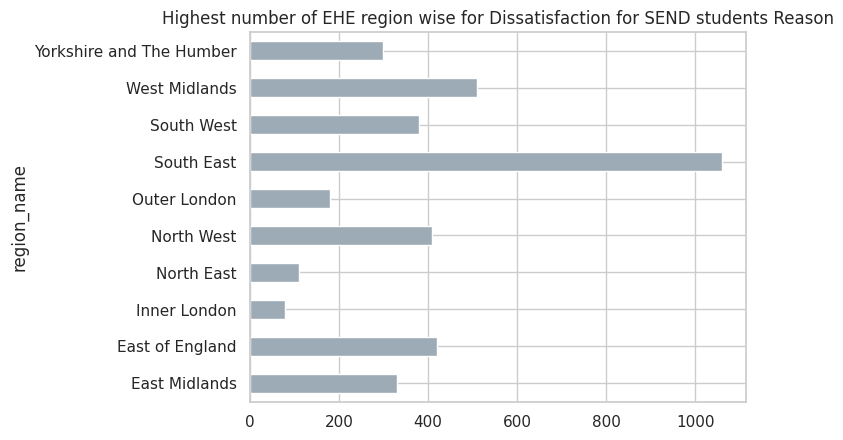

In [ ]:
rep_female=final_df.groupby('region_name')['ehe_reason_school_dissatisfaction_send'].sum().plot.barh(title="Highest number of EHE region wise for Dissatisfaction for SEND students Reason", color='#9dabb6')


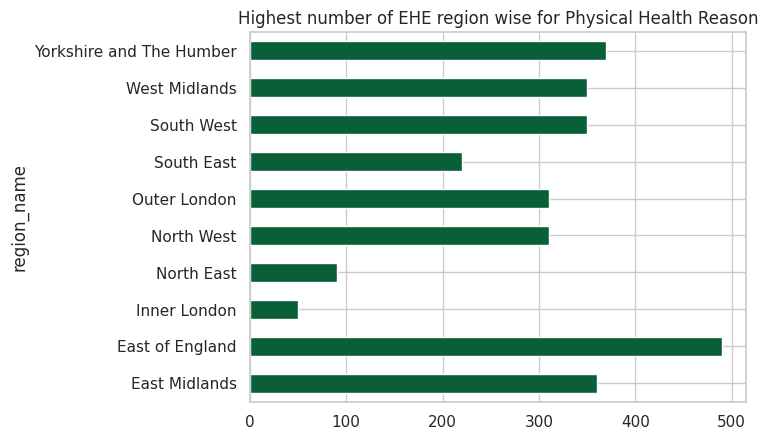

In [ ]:
final_df['ehe_reason_physical_health'] = pd.to_numeric(final_df['ehe_reason_physical_health'], errors='coerce')

rep_female=final_df.groupby('region_name')['ehe_reason_physical_health'].sum().plot.barh(title="Highest number of EHE region wise for Physical Health Reason", color='#085f38')

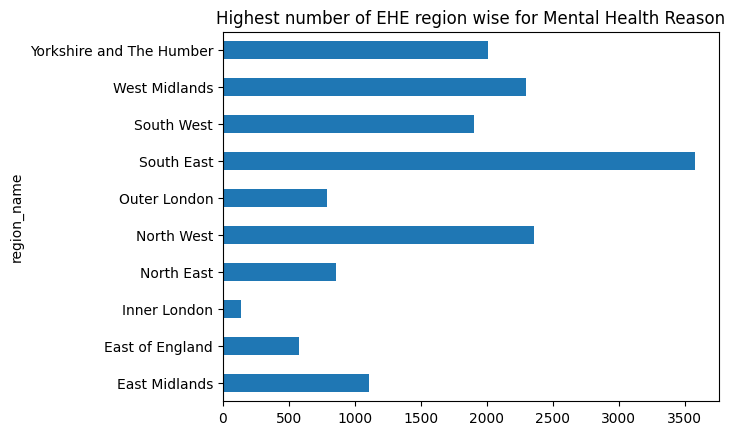

In [ ]:
final_df['ehe_reason_mental_health'] = pd.to_numeric(final_df['ehe_reason_mental_health'], errors='coerce')

rep_female=final_df.groupby('region_name')['ehe_reason_mental_health'].sum().plot.barh(title="Highest number of EHE region wise for Mental Health Reason")